In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
import warnings
warnings.filterwarnings(action='ignore')

# 4.6 로지스틱 회귀

## 1. logistic regression
- logistic regression, 또는 logit regression은 샘플이 특정 클래스에 속할 확률 을 추정하는 데 널리 사용
- 입력 특성의 가중치 합을 계산한 후 결과값의 logistic을 출력
- logistic은 시그모이드 함수를 의미함 (이진 분류의 경우)
- 비용 함수는 log loss 사용
- log-likelyhood loss에 대한 정규방정식은 존재하지 않으므로 경사하강법을 이용할 수 있음
- __결정 경계__ 는 클래스를 결정하는 특성의 경계를 의미함

#### 결정 경계 정하기

In [126]:
from sklearn import datasets
iris=datasets.load_iris()

In [127]:
iris.keys() # 데이터, 타겟(정답),타겟 이름, 데이터 정보, 특성 이름, 데이터경로

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [128]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [129]:
# 데이터 관찰
# iris-verginica 와 아닌 것으로 라벨 나누기
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']==2], columns= iris['feature_names'] + ['verginica'])

In [130]:
data #  꽃받침 길이, 너비, 꽃잎의 길이, 너비, verginica 유무

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),verginica
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [131]:
#X=data.drop(["verginica"],axis=1) # 여기서는 결과를 가시화하기 위해 하나의 특성만 사용
# X=data[data.columns[3]] # 꽃잎의 너비 -> 1d np.array로 입력됨
X=iris["data"][:,3].reshape(-1,1)
y=(iris["target"]==2).astype(np.int) #boolean 에서 int로 타입 바꿔줌 (1일 확률을 예측해야 하기 때문)

In [132]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
X_new=np.linspace(0,3,1000).reshape(-1,1) # 0부터3까지 일정한 간격으로 하게 1000개의 원소를 가진 열벡터
y_proba=log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # 1일 확률이 0.5가 넘어가는 x값(꽃잎의 너비 value)

Text(0, 0.5, 'probabitily')

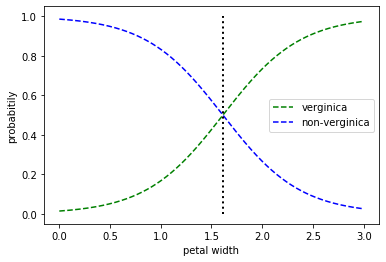

In [134]:
plt.plot(X_new,y_proba[:,1],"g--",label="verginica")
plt.plot(X_new,y_proba[:,0],"b--",label="non-verginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.legend()
plt.xlabel("petal width")
plt.ylabel("probabitily")
#plt.axis([0, 3, -0.02, 1.02])

#### 여러개 특성 사용 ver

In [135]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

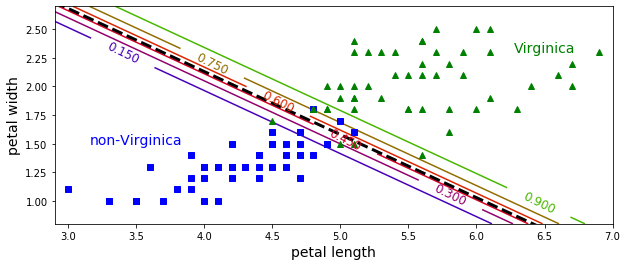

In [136]:
log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( #?
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] # 2열짜리

y_proba = log_reg.predict_proba(X_new)

# 꽃잎의 길이와 폭에 대하여 그래프에 plot
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs") # non_verginica는 파란색으로 표시
plt.plot(X[y==1, 0], X[y==1, 1], "g^") # verginica 는 초록색으로 표시

# 1일 확률 (verginica일 확률)
zz = y_proba[:, 1].reshape(x0.shape) # verginica일 확률을 예측하는 열을 떼어다가 열백터로 reshape
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) # 결정경계 여러개 표시 (?)


left_right = np.array([2.9, 7]) # x축 범위
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1] # 결정경계? 요건 다시 확인해보기

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3) # 결정경계
plt.text(3.5, 1.5, "non-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

## 2. softmax regression
- 로지스틱 회귀 모델의 한 종류
- 다중 클래스에 대하여 각 클래스에 속할 확률의 예측한다
- 각 클래스에 대한 점수를 계산 한 후 softmax 함수를 사용하여 확률을 추정한다.
- 각 클레스에 대한 가중치는 각 파라미터 행렬의 각 행을 이룬다.
- 비용 함수로 cross entropy를 사용한다
- 클래스가 두개일 때, 비용함수는 로지스틱 회귀의 비용함수와 동일하다.

In [137]:
X=iris["data"][:,(2,3)]
y=iris["target"]

In [139]:
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])